In [ ]:
!pip install Keras==2.2.4

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
!pip install imblearn

In [1]:
!pip install --upgrade pip

  Using cached pip-20.2.2-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip\\_internal\\build_env.py'
Consider using the `--user` option or check the permissions.



Preprocessing

Modeling

In [203]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import auc
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_recall_curve as pc_curve
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score, precision_score,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [204]:
df=pd.read_csv("new_75k.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,6,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Renaming the columns

In [250]:
df=df.rename(columns={'Profit (Loss) before Taxation\nth GBP Last avail. yr':'Profit (Loss) before Taxation','Liquidity Ratio (x)\nLast avail. yr':'Liquidity ratio','Profit (Loss) for period [=Net income]\nth GBP Last avail. yr':'Net income','EBIT margin (%)\nLast avail. yr':'EBIT margin','EBITDA\nth GBP Last avail. yr':'EBIDTA','Turnover\nth GBP Last avail. yr':'Turnover','Long Term Liabilities\nth GBP Last avail. yr':'Long term liabilities','Current Liabilities\nth GBP Last avail. yr':'Current liabilities','Current Assets\nth GBP Last avail. yr': "Current assets",'Total Assets\nth GBP Last avail. yr': "Total assets",'Number of employees\nLast avail. yr': "Number of employees", 'Shareholders Funds\nth GBP Last avail. yr': "Shreholder funds"})

# Analyzing the missing values

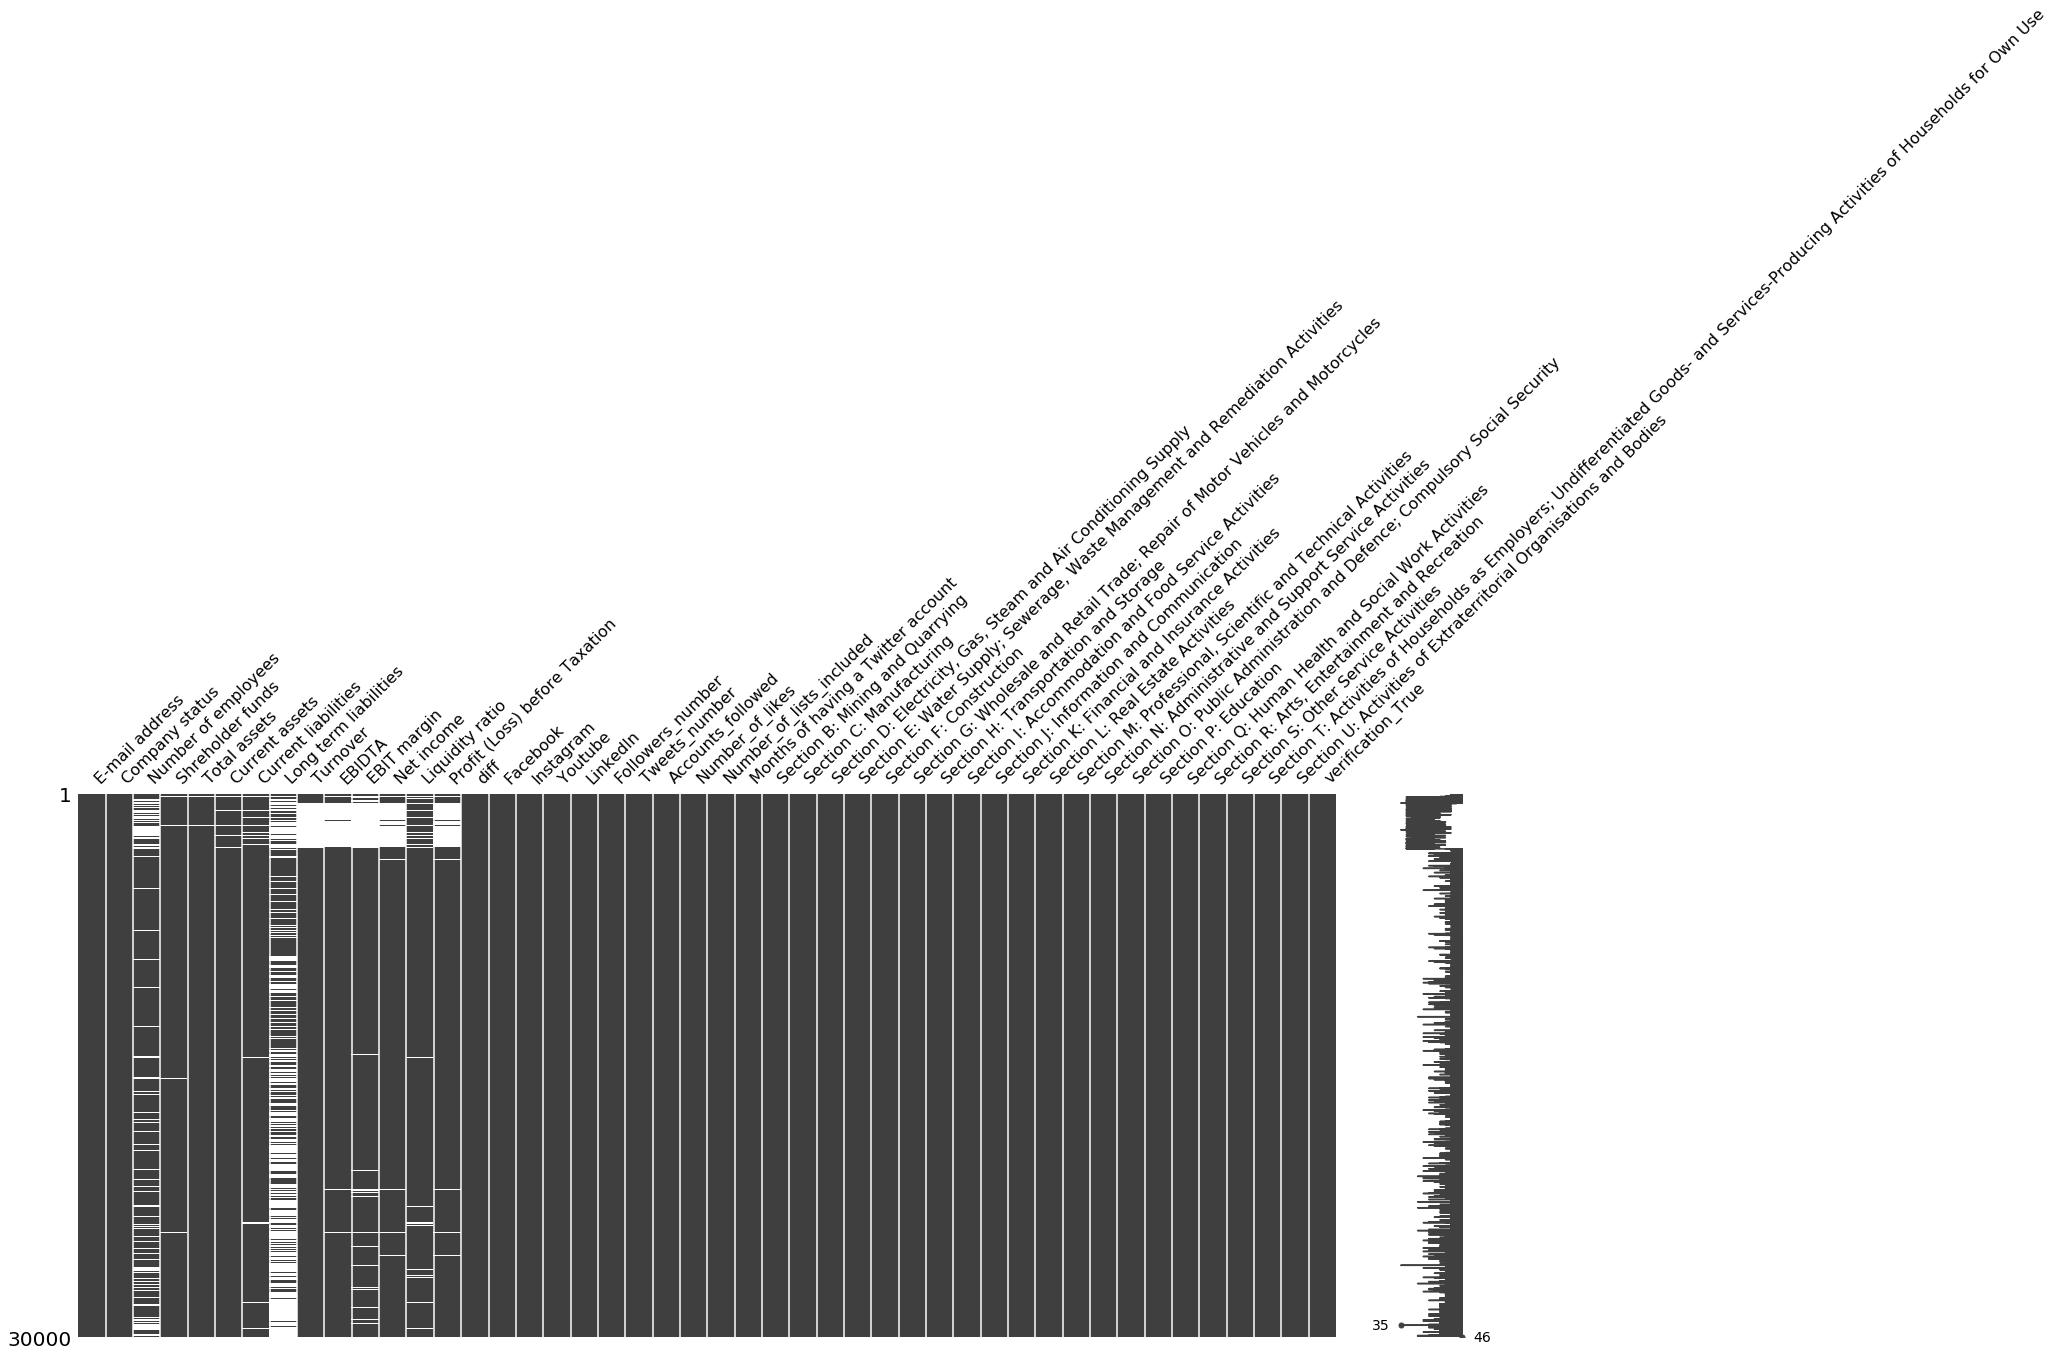

In [251]:
msno.matrix(df)

Creating a subset of 30000 varibales as the rest contain a lot of missing data

In [249]:
df=df[:30000]

Dropping variables that are not needed anymore

In [207]:
df=df.drop(['Years of Twitter account','Twitter','Company name', 'Registered number', 'Latest accounts date', 'Website', 'Status date','Cost of Sales\nth GBP Last avail. yr','Taxation\nth GBP Last avail. yr'],axis=1)

Cleaning columns that contain the input 'n.s'

In [252]:
def liquid(value):
    if value=='n.s.':                                      
        return np.nan
    else:
        return value
# df['Liquidity Ratio (x)\nLast avail. yr']=df['Liquidity Ratio (x)\nLast avail. yr'].map(liquid)
# df['Liquidity Ratio (x)\nLast avail. yr']=df['Liquidity Ratio (x)\nLast avail. yr'].astype(str).str.replace(',', '').astype(float)
# df['Turnover\nth GBP Last avail. yr']=df['Turnover\nth GBP Last avail. yr'].map(liquid)
# df['Turnover\nth GBP Last avail. yr']=df['Turnover\nth GBP Last avail. yr'].astype(str).str.replace(',', '').astype(float)


In [253]:
for i in df.columns:
    df[i]=df[i].map(liquid)
    df[i]=df[i].astype(str).str.replace(',', '').astype(float)

In [254]:
df.describe()

,E-mail address,Company status,Number of employees,Shreholder funds,Total assets,Current assets,Current liabilities,Long term liabilities,Turnover,EBIDTA,...,"Section M: Professional, Scientific and Technical Activities",Section N: Administrative and Support Service Activities,Section O: Public Administration and Defence; Compulsory Social Security,Section P: Education,Section Q: Human Health and Social Work Activities,"Section R: Arts, Entertainment and Recreation",Section S: Other Service Activities,Section T: Activities of Households as Employers; Undifferentiated Goods- and Services-Producing Activities of Households for Own Use,Section U: Activities of Extraterritorial Organisations and Bodies,verification_True
count,30000.000000,30000.000000,25014.000000,2.976700e+04,2.988700e+04,2.977300e+04,2.939700e+04,1.542100e+04,2.751400e+04,2.741700e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.848567,0.101467,54.409251,2.649449e+03,8.172956e+03,4.979917e+03,-3.869090e+03,-3.349944e+03,7.326784e+03,6.690655e+02,...,0.085233,0.091833,0.002600,0.110000,0.101367,0.075433,0.080767,0.000900,0.000967,0.086000
std,0.358477,0.301951,70.092218,1.654655e+04,3.748696e+04,2.690885e+04,2.811700e+04,2.271022e+04,1.759243e+04,1.418274e+04,...,0.279233,0.288795,0.050925,0.312895,0.301819,0.264094,0.272481,0.029987,0.031077,0.280369
min,0.000000,0.000000,1.000000,-2.761620e+05,0.000000e+00,0.000000e+00,-3.037525e+06,-1.035457e+06,-4.500000e+01,-1.390110e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,8.300000e+01,4.105000e+02,2.510000e+02,-3.066000e+03,-1.349000e+03,5.890000e+02,-1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,32.000000,7.720000e+02,2.465000e+03,1.179000e+03,-6.520000e+02,-2.610000e+02,2.720000e+03,1.130000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,79.000000,3.651500e+03,8.469000e+03,5.010000e+03,-9.300000e+01,-4.500000e+01,1.133875e+04,7.470000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,4906.000000,2.542900e+06,3.069662e+06,3.069662e+06,0.000000e+00,9.264000e+03,2.005067e+06,2.002549e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Missing values imputation

Iterative imputer utilizing BayesianRidge method for missing values prediction

In [213]:
from sklearn.ensemble import ExtraTreesRegressor
imp = IterativeImputer(max_iter=10, verbose=0) #,estimator= ExtraTreesRegressor(n_estimators=10, random_state=0))
imp.fit_transform(df)
imputed_df = imp.transform(df)

In [214]:
imputed_df

array([[  1.        ,   1.        ,  66.        , ...,   0.        ,
          0.        ,   0.        ],
       [  1.        ,   1.        ,  91.34818164, ...,   0.        ,
          0.        ,   0.        ],
       [  1.        ,   1.        , 200.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  1.        ,   0.        ,   2.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  28.4381824 , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   2.        , ...,   0.        ,
          0.        ,   0.        ]])

In [216]:
data = pd.DataFrame(data=imputed_df, 
                             columns=df.columns)

In [217]:
#data.to_csv('final_30k.csv', index=False)

In [218]:
data['Number of employees']=data['Number of employees'].round()

In [219]:
#data.to_csv('preprocessed_df.csv', index=False)

Creating financial ratios based on the fianncial information, converting 0s to 0.1s in order to division to be valid 

In [256]:
def change(value):
    if value== 0:
        return 0.1
    else:
        return value
data['Total assets']=data['Total assets'].map(change)
data['Current liabilities']=data['Current liabilities'].map(change)
data['Shreholder funds']=data['Shreholder funds'].map(change)
data['current ratio']=data['Current assets']/data['Current liabilities']
data['return on asset']=data['Net income']/data['Total assets']
data["debt ratio"]=(data['Current liabilities']+data['Long term liabilities'])/data['Total assets']
data['return on equity']=data['Net income']/data['Shreholder funds']
data['debt-equity ratio']=(data['Current liabilities']+data['Long term liabilities'])/data['Shreholder funds']

Detecting outliers with IQR

In [257]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data=data.drop(data_out.index,axis=0)

E-mail address                                                                                                                              0.000000
Company status                                                                                                                              0.000000
Number of employees                                                                                                                        60.000000
Shreholder funds                                                                                                                         3532.000000
Total assets                                                                                                                             8035.250000
Current assets                                                                                                                           4739.250000
Current liabilities                                                                                       

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

Removing outliers with LocalOutlier factor

In [258]:
# loc= LocalOutlierFactor()
# outliers_loc = loc.fit_predict(data)
# data['outlier_lof'] = pd.DataFrame(outliers_loc)

In [259]:
# print(data['outlier_lof'].head())
#print(data['outlier_lof'].value_counts())

In [260]:
# data=data[data['outlier_lof']==1]
# data=data.drop('outlier_lof',axis=1)

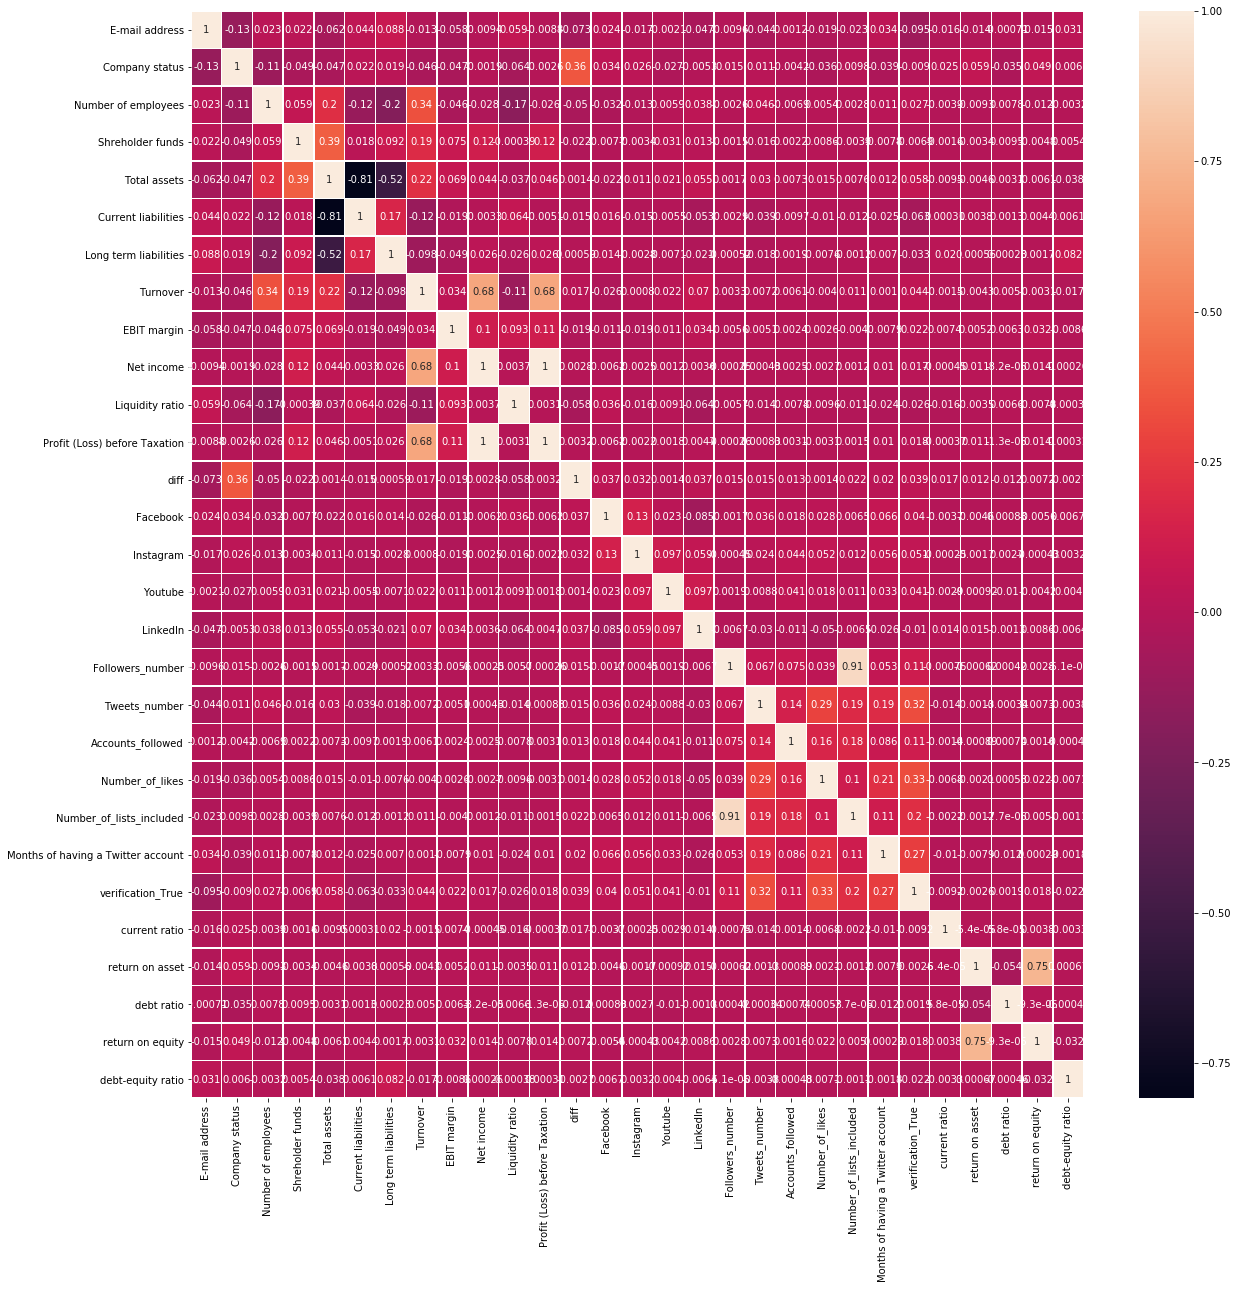

In [266]:
corrMatrix = data.drop(['Section B: Mining and Quarrying',
       'Section C: Manufacturing',
       'Section D: Electricity, Gas, Steam and Air Conditioning Supply',
       'Section E: Water Supply; Sewerage, Waste Management and Remediation Activities',
       'Section F: Construction',
       'Section G: Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
       'Section H: Transportation and Storage',
       'Section I: Accommodation and Food Service Activities',
       'Section J: Information and Communication',
       'Section K: Financial and Insurance Activities',
       'Section L: Real Estate Activities',
       'Section M: Professional, Scientific and Technical Activities',
       'Section N: Administrative and Support Service Activities',
       'Section O: Public Administration and Defence; Compulsory Social Security',
       'Section P: Education',
       'Section Q: Human Health and Social Work Activities',
       'Section R: Arts, Entertainment and Recreation',
       'Section S: Other Service Activities',
       'Section T: Activities of Households as Employers; Undifferentiated Goods- and Services-Producing Activities of Households for Own Use',
       'Section U: Activities of Extraterritorial Organisations and Bodies','Current assets','EBIDTA'],axis=1).corr()

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [268]:
calc_vif(data.drop(['Section B: Mining and Quarrying',
       'Section C: Manufacturing',
       'Section D: Electricity, Gas, Steam and Air Conditioning Supply',
       'Section E: Water Supply; Sewerage, Waste Management and Remediation Activities',
       'Section F: Construction',
       'Section G: Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
       'Section H: Transportation and Storage',
       'Section I: Accommodation and Food Service Activities',
       'Section J: Information and Communication',
       'Section K: Financial and Insurance Activities',
       'Section L: Real Estate Activities',
       'Section M: Professional, Scientific and Technical Activities',
       'Section N: Administrative and Support Service Activities',
       'Section O: Public Administration and Defence; Compulsory Social Security',
       'Section P: Education',
       'Section Q: Human Health and Social Work Activities',
       'Section R: Arts, Entertainment and Recreation',
       'Section S: Other Service Activities',
       'Section T: Activities of Households as Employers; Undifferentiated Goods- and Services-Producing Activities of Households for Own Use',
       'Section U: Activities of Extraterritorial Organisations and Bodies','Current assets','EBIDTA'],axis=1)
)

,variables,VIF
0,E-mail address,5.112878e+00
1,Company status,1.328235e+00
2,Number of employees,2.146890e+00
3,Shreholder funds,2.328399e+07
4,Total assets,1.225495e+08
5,Current liabilities,6.596182e+07
6,Long term liabilities,2.263816e+07
7,Turnover,3.050522e+00
8,EBIT margin,1.219976e+00
9,Net income,1.211679e+03


The variables 'EBIT margin', 'return on equity', 'Profit (Loss) before Taxation', 'Number_of_lists_included', 'Current assets', 'Current liabilities', 'EBIDTA' indicate high correlation with other variables or have a high VIF so have to be dropped

In [269]:
x_features=data.drop(['Company status','EBIDTA','Number_of_lists_included','Current assets'],axis=1)

y=data['Company status']

In [313]:
#scaled_x = MinMaxScaler().fit_transform(x_features)
# ss = StandardScaler()
# scaled_x = ss.fit_transform(x_features)
#scaled_x=RobustScaler().fit_transform(x_features)
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('Company status',axis=1), y, test_size=0.3,random_state=0)
#smt = SMOTE()
#smt = SMOTEENN()
###smt = SMOTETomek()
#sm = ADASYN()
###x_train, y_train = smt.fit_sample(X_train, Y_train)
#rfcl=RandomForestClassifier()


In [314]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
pred= clf.predict(X_test)

In [315]:
print("F1 score: "+str(f1(Y_test,pred)))

F1 score: 0.8952819332566168


In [316]:
print("Confusion matrix: \n"+str(cm(Y_test,pred)))

Confusion matrix: 
[[8040   39]
 [ 143  778]]


In [317]:
columns = list(df1.drop('Company status',axis=1).columns)
print(list(zip(df1.drop('Company status',axis=1)[columns],list(map(lambda x: x.round(3),model.feature_importances_)))))

[('E-mail address', 0.023), ('Number of employees', 0.028), ('Shreholder funds', 0.065), ('Total assets', 0.044), ('Long term liabilities', 0.037), ('Turnover', 0.024), ('EBIT margin', 0.015), ('Net income', 0.049), ('Liquidity ratio', 0.038), ('Profit (Loss) before Taxation', 0.03), ('diff', 0.171), ('Facebook', 0.02), ('Instagram', 0.134), ('LinkedIn', 0.2), ('Followers_number', 0.009), ('Tweets_number', 0.003), ('Accounts_followed', 0.002), ('Number_of_likes', 0.007), ('Months of having a Twitter account', 0.008), ('Section C: Manufacturing', 0.008), ('Section F: Construction', 0.006), ('Section G: Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles', 0.007), ('Section H: Transportation and Storage', 0.008), ('Section J: Information and Communication', 0.007)]


In this stage we have applied the the Random Forest Classifier as an embeded filter selection method to the evaluate the importance of the selected features
We exclude features that have low explanatory power

So bellow is the final dataset

In [318]:
#df1=data.drop(['Section K: Financial and Insurance Activities','Section S: Other Service Activities','Section H: Transportation and Storage','Section L: Real Estate Activities','Section I: Accommodation and Food Service Activities','Section O: Public Administration and Defence; Compulsory Social Security','Section E: Water Supply; Sewerage, Waste Management and Remediation Activities','Section B: Mining and Quarrying','Section D: Electricity, Gas, Steam and Air Conditioning Supply', 'Section T: Activities of Households as Employers; Undifferentiated Goods- and Services-Producing Activities of Households for Own Use','Section U: Activities of Extraterritorial Organisations and Bodies','Section O: Public Administration and Defence; Compulsory Social Security','Section E: Water Supply; Sewerage, Waste Management and Remediation Activities','Section B: Mining and Quarrying','Section D: Electricity, Gas, Steam and Air Conditioning Supply', 'Section T: Activities of Households as Employers; Undifferentiated Goods- and Services-Producing Activities of Households for Own Use','Section U: Activities of Extraterritorial Organisations and Bodies','Section R: Arts, Entertainment and Recreation','Section Q: Human Health and Social Work Activities','Section F: Construction','Section J: Information and Communication','Section N: Administrative and Support Service Activities','Profit (Loss) before Taxation','Current liabilities','Current assets','EBIDTA','return on equity','verification_True','Youtube','Section M: Professional, Scientific and Technical Activities','Instagram','Number_of_lists_included'],axis=1)


In [312]:
df1=data.drop(['Section U: Activities of Extraterritorial Organisations and Bodies','Section T: Activities of Households as Employers; Undifferentiated Goods- and Services-Producing Activities of Households for Own Use','Section S: Other Service Activities','Section O: Public Administration and Defence; Compulsory Social Security','Section N: Administrative and Support Service Activities','Section L: Real Estate Activities','Section K: Financial and Insurance Activities','Section I: Accommodation and Food Service Activities','Section E: Water Supply; Sewerage, Waste Management and Remediation Activities','Section D: Electricity, Gas, Steam and Air Conditioning Supply','Section B: Mining and Quarrying','Youtube','Number_of_lists_included','EBIDTA','Current liabilities','Current assets','Current liabilities','Section R: Arts, Entertainment and Recreation','Section Q: Human Health and Social Work Activities','return on asset','current ratio','Section M: Professional, Scientific and Technical Activities','debt ratio','Section P: Education','return on equity','verification_True','debt-equity ratio'],axis=1)

In [320]:
df1.columns

Index(['E-mail address', 'Company status', 'Number of employees',
       'Shreholder funds', 'Total assets', 'Long term liabilities', 'Turnover',
       'EBIT margin', 'Net income', 'Liquidity ratio',
       'Profit (Loss) before Taxation', 'diff', 'Facebook', 'Instagram',
       'LinkedIn', 'Followers_number', 'Tweets_number', 'Accounts_followed',
       'Number_of_likes', 'Months of having a Twitter account',
       'Section C: Manufacturing', 'Section F: Construction',
       'Section G: Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
       'Section H: Transportation and Storage',
       'Section J: Information and Communication'],
      dtype='object')

In [357]:
#df1.to_csv('final_dataset.csv', index=False)

In [ ]:
Implementing RobustScaler to account for outliers  as we wanted to minize the information loss due to small size of the minority class  class
Applying SMOTE and Tomek LInks to increase minority class number

ALGORITHM APPLICATION

In [ ]:
x_features=df1.drop('Company status',axis=1)
y=df1['Company status']

In [381]:
def predicting(algorithm,X,Y):
    scaled_x=RobustScaler().fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(scaled_x, Y, test_size=0.3,random_state=0,stratify=Y)
    smt = SMOTETomek()
    x_train, y_train = smt.fit_sample(X_train, Y_train)
    df_tr = pd.DataFrame(data=x_train, columns=X.columns)
    Xtr_test=pd.DataFrame(data=X_test, columns=X.columns)
    clf=algorithm.fit(df_tr,y_train)
    print(np.mean(cross_val_score(clf, x_train, y_train, cv=5,scoring='f1')))
    pred=clf.predict(Xtr_test)
    print("F1 score: "+str(f1(Y_test,pred)))
    print("recall score: "+str(recall(Y_test,pred)))
    print("precision score: "+str(precision(Y_test,pred)))
    print("roc_auc_score score: "+str(roc_auc_score(Y_test,pred)))
    print('accuracy scoe:'+str(accuracy_score(Y_test,pred)))
    print('cm:'+str(cm(Y_test,pred)))
    if 'LogisticRegression' in str(algorithm):
        f_imp=[]
        for i in classifier.coef_.round(4):
            for v in i:
                f_imp.append(v)
        col=df_tr.columns
        dd=dict(zip(col,ll))
        #return dd
        f, ax = plt.subplots(figsize=(10,10))
        plt.barh(range(len(dd)), list(dd.values()), align='center',color=[ 'purple','orange' ])
        plt.yticks(range(len(dd)), list(dd.keys()))
        plt.xlabel('Coefficients')
        plt.ylabel('Features')
        plt.gca().invert_yaxis()
        ax.invert_yaxis()  
    if 'RandomForestClassifier' in str(algorithm):
        random_dict=dict(zip(df_tr.columns,clf.feature_importances_.round(3)))
        f, ax = plt.subplots(figsize=(10,10))
        plt.barh(range(len(random_dict)), list(random_dict.values()), align='center',color=[ 'purple','orange' ])
        plt.yticks(range(len(random_dict)), list(random_dict.keys()))
        plt.xlabel('Coefficients')
        plt.ylabel('Features')
        plt.gca().invert_yaxis()
        ax.invert_yaxis() 
        

LOGISTIC REGRESSION

0.7941832230503683
F1 score: 0.4485181790406355
recall score: 0.8039430449069004
precision score: 0.31101694915254235
roc_auc_score score: 0.8014398048820393
accuracy scoe:0.7994444444444444
cm:[[6461 1626]
 [ 179  734]]


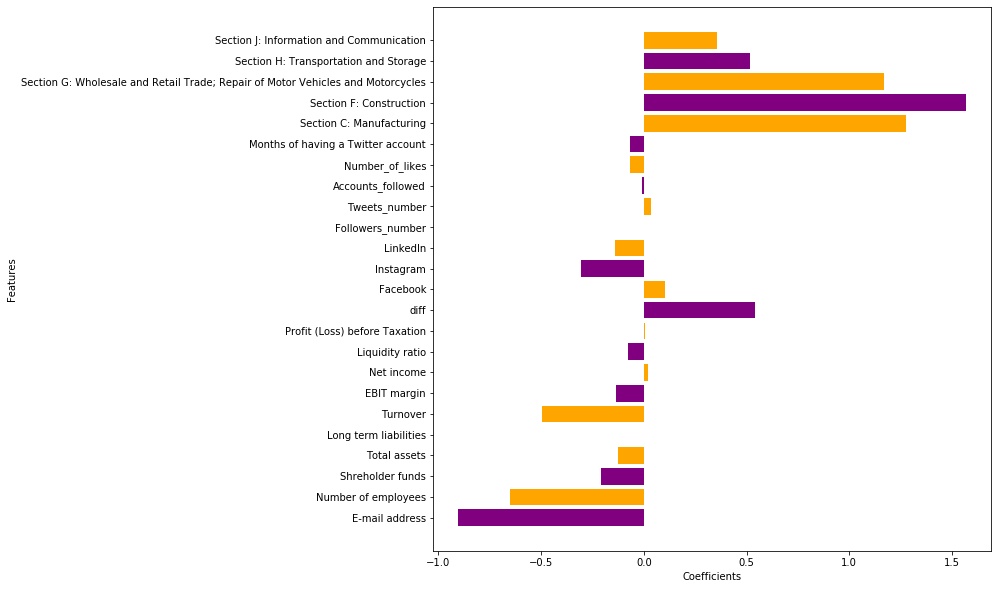

In [382]:
predicting(LogisticRegression(solver='liblinear'),x_features,y)

SUPPORT VECTOR MACHINES (SVM)

In [363]:
predicting(SVC(gamma='auto'),x_features,y)

0.9570944277933966
F1 score: 0.7776081424936386
recall score: 0.836801752464403
precision score: 0.7262357414448669
roc_auc_score score: 0.9005945203523945
accuracy scoe:0.9514444444444444
cm:[[7799  288]
 [ 149  764]]


CLASSIFICATION DECISION TREE

In [383]:
predicting(DecisionTreeClassifier(),x_features,y)

0.9754729089392647
F1 score: 0.8568443051201672
recall score: 0.8981380065717415
precision score: 0.8191808191808192
roc_auc_score score: 0.9378782032364087
accuracy scoe:0.9695555555555555
cm:[[7906  181]
 [  93  820]]


RANDOM FOREST CLASSIFIER

0.9876068583516082
F1 score: 0.8954895489548954
recall score: 0.891566265060241
precision score: 0.8994475138121547
roc_auc_score score: 0.9401568186930981
accuracy scoe:0.9788888888888889
cm:[[7996   91]
 [  99  814]]


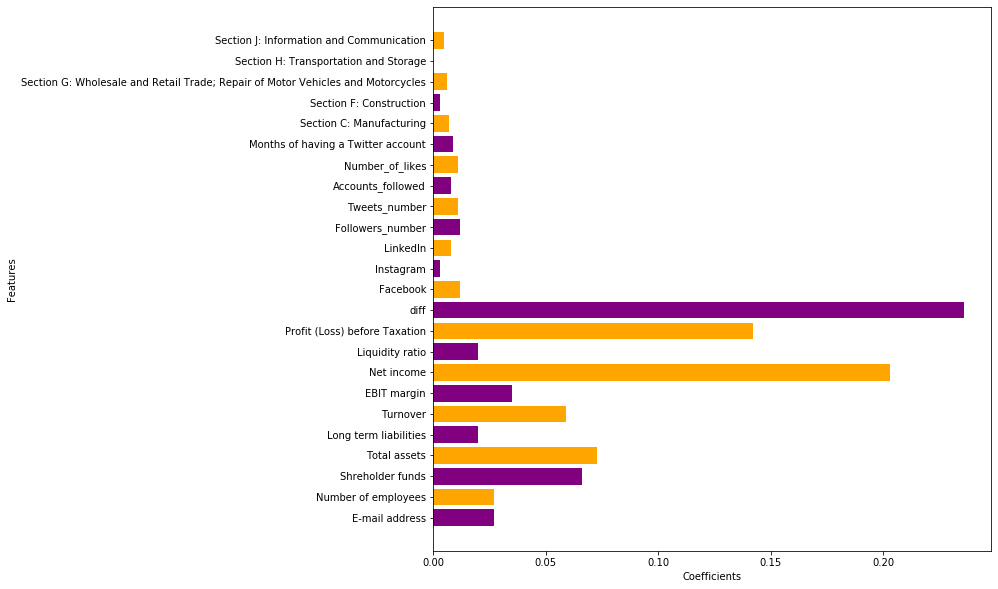

In [384]:
predicting(RandomForestClassifier(n_estimators=100),x_features,y)

NEURAL NETWORKS

In [385]:
predicting(MLPClassifier(random_state=1, max_iter=300).fit(df_tr, y_train),x_features,y)

0.9539943502854724
F1 score: 0.7727049582719686
recall score: 0.8619934282584885
precision score: 0.7001779359430605
roc_auc_score score: 0.9101608046448867
accuracy scoe:0.9485555555555556
cm:[[7750  337]
 [ 126  787]]
